In [1]:
pip install networkx matplotlib 

Note: you may need to restart the kernel to use updated packages.


Total Duration of the Project:  36
Critical Path:  ['A', 'B', 'D', 'H', 'I', 'L']


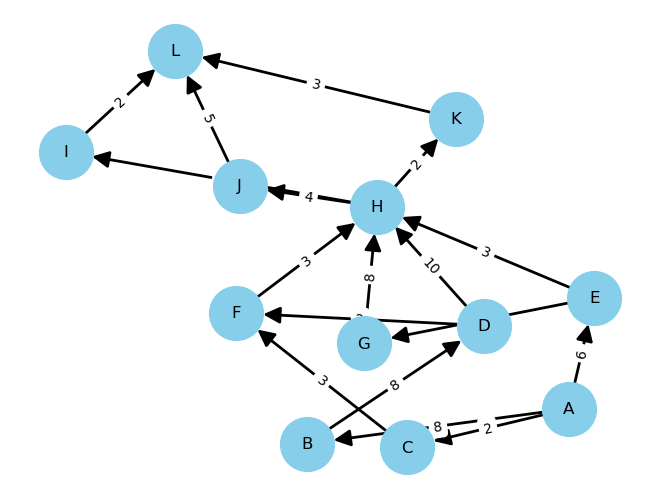

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 8, 7, 500000, 530000),
    ("A", "C", 2, 1, 10000, 15000),
    ("A", "E", 6, 5, 15000, 35000),
    ("B", "D", 8, 4, 300000, 460000),
    ("C", "F", 3, 2, 50000, 100000),
    ("D", "F", 2, 1, 400000, 450000),
    ("D", "H", 10, 6, 50000, 250000),
    ("E", "H", 3, 2, 20000, 500000),
    ("E", "G", 3, 1, 60000, 100000),
    ("F", "H", 3, 1, 500000, 600000),
    ("G", "H", 8, 2, 400000, 800000),
    ("H", "I", 8, 2, 30000, 42000),
    ("H", "J", 4, 4, 100000, 140000),
    ("H", "K", 2, 1, 90000, 190000),
    ("I", "L", 2, 1, 500000, 900000),
    ("J", "L", 5, 4, 100000, 140000),
    ("K", "L", 3, 1, 200000, 600000)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    G.add_edge(activity[0], activity[1], normal_duration=activity[2], crash_duration=activity[3], normal_cost=activity[4], crash_cost=activity[5])

# Draw the network diagram
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, width=2,arrowsize=25)
edge_labels = nx.get_edge_attributes(G, 'normal_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Calculate the total duration of the project
total_duration = sum(G.edges[activity]['normal_duration'] for activity in zip(critical_path, critical_path[1:]))

print("Total Duration of the Project: ", total_duration)



# Find the critical path
critical_path = nx.dag_longest_path(G, weight='normal_duration')
print("Critical Path: ", critical_path)
plt.show()


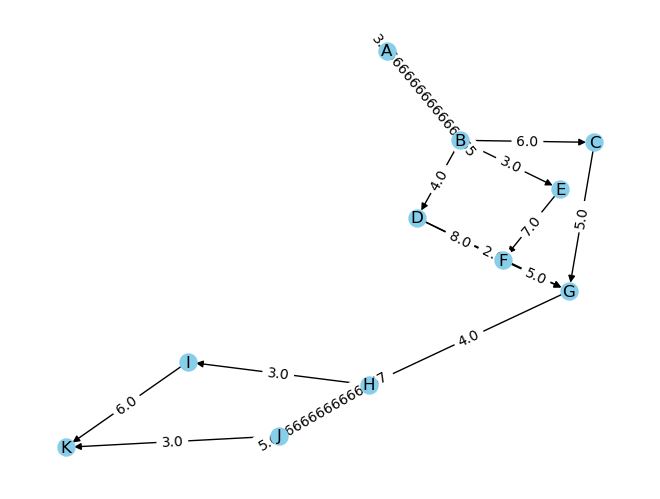

Critical Path:  ['A', 'B', 'D', 'F', 'G', 'H', 'I', 'K']
Estimated Overall Mean Duration:  33.166666666666664


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 2, 3, 5),
    ("B", "C", 4, 6, 8),
    ("B", "D", 3, 4, 5),
    ("B", "E", 2, 3, 4),
    ("C", "G", 3, 5, 7),
    ("D", "F", 4, 8, 12),
    ("D", "G", 1, 2, 3),
    ("E", "F", 6, 7, 8),
    ("F", "G", 3, 5, 7),
    ("G", "H", 2, 4, 6),
    ("H", "I", 1, 3, 5),
    ("H", "J", 3, 6, 7),
    ("I", "K", 5, 6, 7),
    ("J", "K", 1, 3, 5)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    mean_duration = (activity[2] + 4*activity[3] + activity[4]) / 6
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Calculate the earliest start and latest finish for each activity
earliest_start = nx.dag_longest_path_length(G, weight='mean_duration')
latest_finish = {node: earliest_start for node in G.nodes}

# Find the critical path
critical_path = nx.dag_longest_path(G, weight='mean_duration')

# Draw the network diagram
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=150, edge_cmap=plt.cm.Blues, width=1)
edge_labels = nx.get_edge_attributes(G, 'mean_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

print("Critical Path: ", critical_path)
print("Estimated Overall Mean Duration: ", earliest_start)


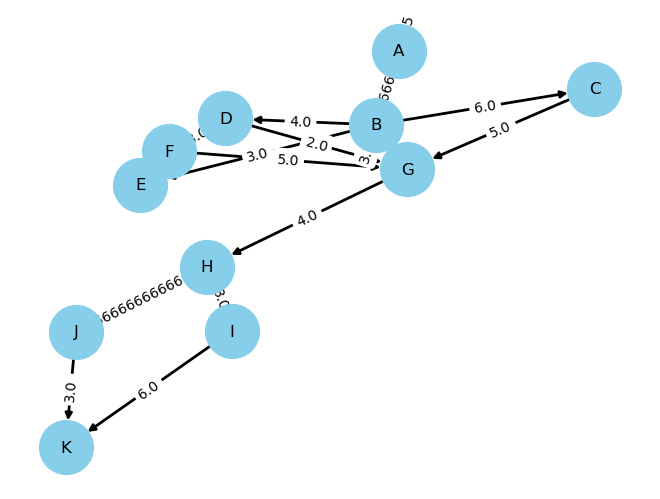

Critical Path:  ['A', 'B', 'D', 'F', 'G', 'H', 'I', 'K']
Estimated Overall Mean Duration:  33.166666666666664


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 2, 3, 5),
    ("B", "C", 4, 6, 8),
    ("B", "D", 3, 4, 5),
    ("B", "E", 2, 3, 4),
    ("C", "G", 3, 5, 7),
    ("D", "F", 4, 8, 12),
    ("D", "G", 1, 2, 3),
    ("E", "F", 6, 7, 8),
    ("F", "G", 3, 5, 7),
    ("G", "H", 2, 4, 6),
    ("H", "I", 1, 3, 5),
    ("H", "J", 3, 6, 7),
    ("I", "K", 5, 6, 7),
    ("J", "K", 1, 3, 5)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    mean_duration = (activity[2] + 4*activity[3] + activity[4]) / 6
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Find the critical path
critical_path = nx.dag_longest_path(G, weight='mean_duration')

# Draw the network diagram
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, width=2)
edge_labels = nx.get_edge_attributes(G, 'mean_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

print("Critical Path: ", critical_path)
print("Estimated Overall Mean Duration: ", sum(edge_labels[edge] for edge in zip(critical_path, critical_path[1:])))


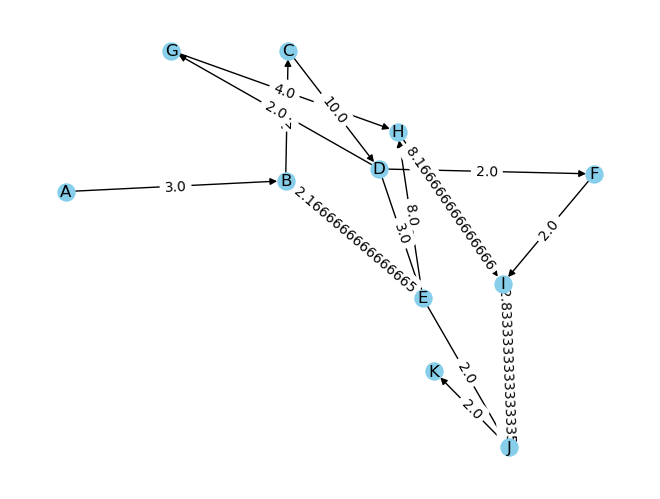

Critical Path:  ['A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K']
Estimated Overall Mean Duration:  39.0


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 1, 3, 5),
    ("B", "C", 1, 2, 3),
    ("B", "E", 1, 2, 4),
    ("C", "D", 7, 10, 13),
    ("D", "E", 2, 3, 4),
    ("D", "F", 1, 2, 3),
    ("D", "G", 1, 2, 3),
    ("E", "H", 6, 8, 10),
    ("E", "J", 1, 2, 3),
    ("F", "I", 1, 2, 3),
    ("G", "H", 2, 4, 6),
    ("H", "I", 6, 8, 11),
    ("I", "J", 1, 3, 4),
    ("J", "K", 1, 2, 3)
]


# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    mean_duration = (activity[2] + 4*activity[3] + activity[4]) / 6
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Find the critical path
critical_path = nx.dag_longest_path(G, weight='mean_duration')

# Draw the network diagram
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=150, edge_cmap=plt.cm.Blues, width=)
edge_labels = nx.get_edge_attributes(G, 'mean_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

print("Critical Path: ", critical_path)
print("Estimated Overall Mean Duration: ", sum(edge_labels[edge] for edge in zip(critical_path, critical_path[1:])))


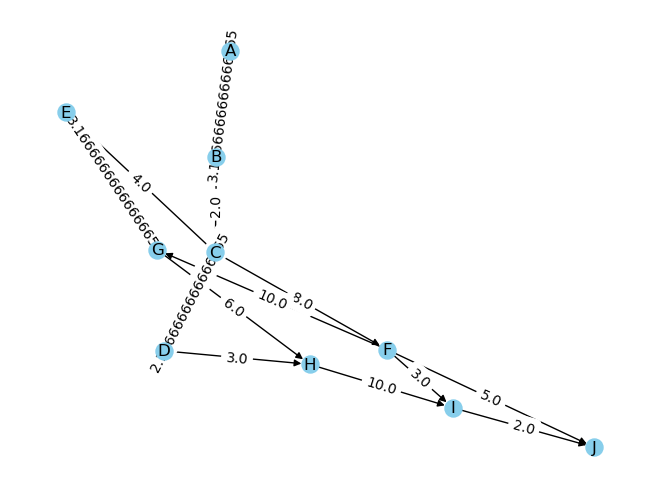

Critical Path:  ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J']
Estimated Overall Mean Duration:  41.166666666666664


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3)
]


# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    mean_duration = (activity[2] + 4*activity[3] + activity[4]) / 6
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Find the critical path
critical_path = nx.dag_longest_path(G, weight='mean_duration')

# Draw the network diagram
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=150, edge_cmap=plt.cm.Blues, width=1)
edge_labels = nx.get_edge_attributes(G, 'mean_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

print("Critical Path: ", critical_path)
print("Estimated Overall Mean Duration: ", sum(edge_labels[edge] for edge in zip(critical_path, critical_path[1:])))


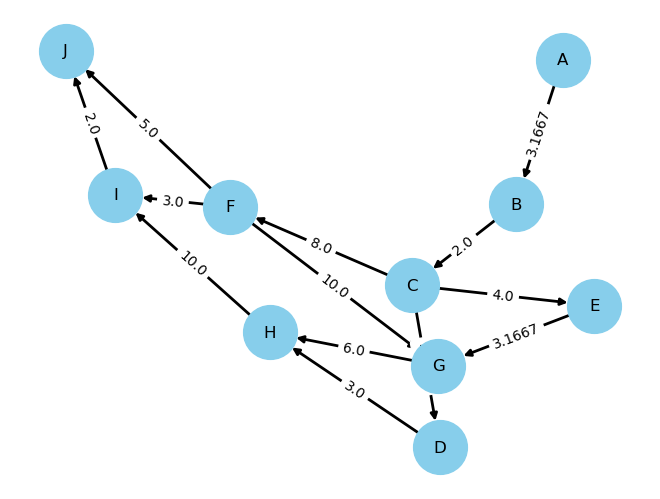

Critical Path:  ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J']
Estimated Overall Mean Duration:  41.1667


In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    mean_duration = round((activity[2] + 4*activity[3] + activity[4]) / 6, 4)  # Round to the nearest 0.0001
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Calculate the earliest start and latest finish for each activity
earliest_start = round(nx.dag_longest_path_length(G, weight='mean_duration'), 4)  # Round to the nearest 0.0001
latest_finish = {node: round(earliest_start, 4) for node in G.nodes}  # Round to the nearest 0.0001

# Find the critical path
critical_path = nx.dag_longest_path(G, weight='mean_duration')

# Draw the network diagram
pos = nx.spring_layout(G, scale=2)  # Increase the scale to make the arrows longer
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, width=2)
edge_labels = nx.get_edge_attributes(G, 'mean_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

print("Critical Path: ", critical_path)
print("Estimated Overall Mean Duration: ", earliest_start)


ValueError: too many values to unpack (expected 2)

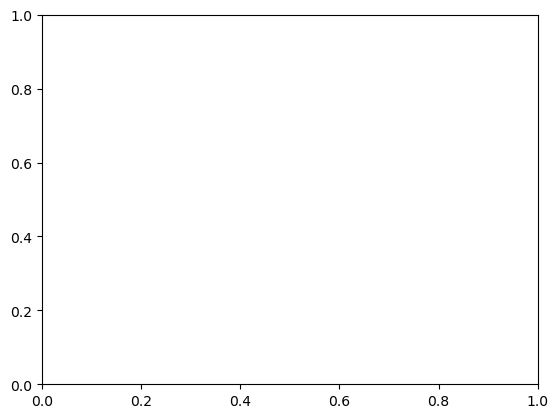

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your project data and 'critical_path' is the calculated critical path
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3)
]

critical_path = ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J']

fig, ax = plt.subplots()

# Define colors for the bars
colors = ['skyblue' if task in critical_path else 'lightgrey' for task in np.array(data)[:, 0]]

# Create the Gantt chart as a horizontal bar chart
ax.broken_barh([(start, end-start) for start, end in np.array(data)[:, 2:4].astype(int)], [(i-0.4, 0.8) for i in range(len(data))], facecolors=colors)

# Set the y-ticks to be the tasks
ax.set_yticks(range(len(data)))
ax.set_yticklabels(np.array(data)[:, 0])

plt.show()


In [18]:

pip install numpy


Note: you may need to restart the kernel to use updated packages.


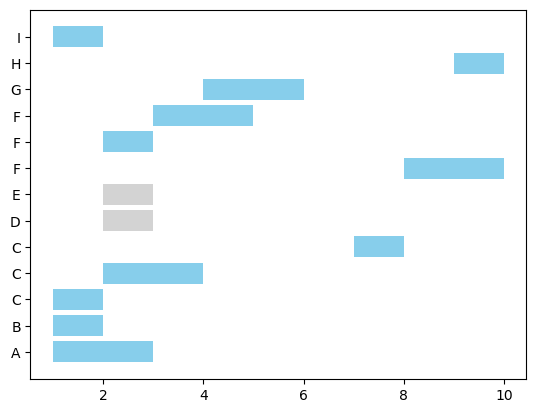

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your project data and 'critical_path' is the calculated critical path
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3)
]

critical_path = ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J']

fig, ax = plt.subplots()

# Define colors for the bars
colors = ['skyblue' if task in critical_path else 'lightgrey' for task in np.array(data)[:, 0]]

# Create the Gantt chart as a horizontal bar chart
for i, (start, end) in enumerate(np.array(data)[:, 2:4].astype(int)):
    ax.broken_barh([(start, end-start)], (i-0.4, 0.8), facecolors=colors[i])

# Set the y-ticks to be the tasks
ax.set_yticks(range(len(data)))
ax.set_yticklabels(np.array(data)[:, 0])

plt.show()


In [22]:
import networkx as nx
import matplotlib.pyplot as plt


# Provided data
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3),
]

# Function to calculate activity durations
def calculate_mean_duration(activity):
    return round((activity[2] + 4 * activity[3] + activity[4]) / 6, 4)


def create_gantt_chart(G, critical_path, earliest_start):
    # Create a new figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Network diagram on the left
    pos = nx.spring_layout(G, scale=2)
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="skyblue",
        node_size=1500,
        edge_cmap=plt.cm.Blues,
        width=2,
        ax=ax1,
    )
    edge_labels = nx.get_edge_attributes(G, "mean_duration")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)

    # Gantt chart on the right
    ax2.barh(
        [node for node in G.nodes],  # Tasks on y-axis
        [calculate_mean_duration(activity) for activity in data],  # Task durations
        left=[earliest_start[node] for node in G.nodes],  # Starting positions based on earliest_start
        height=0.5,  # Bar height
        color="lightgreen",
        alpha=0.7,
        label="Activities",
    )

    # Highlight critical path activities
    for i, node in enumerate(critical_path):
        ax2.barh(
            node,
            [calculate_mean_duration(data[i])],
            left=[earliest_start[node]],
            height=0.5,
            color="orange",
            alpha=0.7,
            label="Critical Path",
        )

    # Customize Gantt chart
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Tasks")
    ax2.invert_yaxis()  # Invert y-axis for chronological order
    ax2.grid(axis="x", linestyle="--", alpha=0.6)
    ax2.legend()

    # Display results
    plt.tight_layout()
    plt.show()


# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph with calculated mean durations
for activity in data:
    mean_duration = calculate_mean_duration(activity)
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Calculate earliest start and latest finish times (already provided)
earliest_start = round(nx.dag_longest_path_length(G, weight="mean_duration"), 4)
latest_finish = {node: round(earliest_start, 4) for node in G.nodes}

# Find the critical path
critical_path = nx.dag_longest_path(G, weight="mean_duration")

# Create the Gantt chart
create_gantt_chart(G.copy(), critical_path.copy(), earliest_start.copy())

print("Critical Path: ",critical_path)


AttributeError: 'float' object has no attribute 'copy'

TypeError: 'float' object is not subscriptable

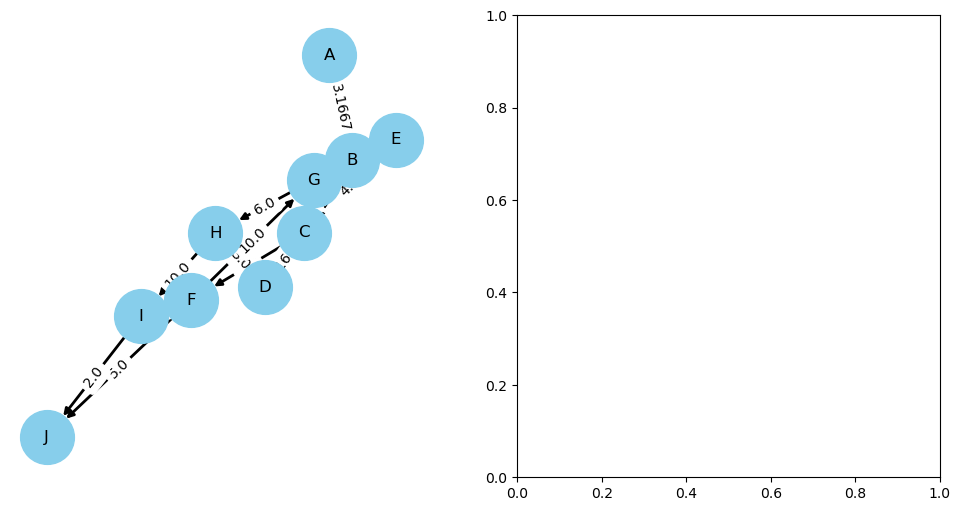

In [23]:
import networkx as nx
import matplotlib.pyplot as plt


# Provided data
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3),
]

# Function to calculate activity durations
def calculate_mean_duration(activity):
    return round((activity[2] + 4 * activity[3] + activity[4]) / 6, 4)


def create_gantt_chart(G, critical_path, earliest_start):
    # Create a new figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Network diagram on the left
    pos = nx.spring_layout(G, scale=2)
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="skyblue",
        node_size=1500,
        edge_cmap=plt.cm.Blues,
        width=2,
        ax=ax1,
    )
    edge_labels = nx.get_edge_attributes(G, "mean_duration")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)

    # Gantt chart on the right
    ax2.barh(
        [node for node in G.nodes],  # Tasks on y-axis
        [calculate_mean_duration(activity) for activity in data],  # Task durations
        left=[earliest_start[node] for node in G.nodes],  # Starting positions based on earliest_start
        height=0.5,  # Bar height
        color="lightgreen",
        alpha=0.7,
        label="Activities",
    )

    # Highlight critical path activities
    for i, node in enumerate(critical_path):
        ax2.barh(
            node,
            [calculate_mean_duration(data[i])],
            left=[earliest_start[node]],
            height=0.5,
            color="orange",
            alpha=0.7,
            label="Critical Path",
        )

    # Customize Gantt chart
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Tasks")
    ax2.invert_yaxis()  # Invert y-axis for chronological order
    ax2.grid(axis="x", linestyle="--", alpha=0.6)
    ax2.legend()

    # Display results
    plt.tight_layout()
    plt.show()


# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph with calculated mean durations
for activity in data:
    mean_duration = calculate_mean_duration(activity)
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Calculate earliest start and latest finish times (already provided)
earliest_start = round(nx.dag_longest_path_length(G, weight="mean_duration"), 4)
latest_finish = {node: round(earliest_start, 4) for node in G.nodes}

# Find the critical path
critical_path = nx.dag_longest_path(G, weight="mean_duration")

# Create the Gantt chart
create_gantt_chart(G.copy(), critical_path.copy(), earliest_start)


In [24]:
# Given data for Week 5
budgeted_cost_work_package = 1500000  # Total budgeted cost for the entire work package
budgeted_cost_per_team = budgeted_cost_work_package / 3  # Assuming equal allocation to each team

# Data for each team at Week 5
team_data = {
    "A": {
        "units_installed": 45,
        "actual_cost": 225000,
        "earned_value": 250000,
        "cpi": 0.9,
        "spi": 0.9
    },
    "B": {
        "units_installed": 50,
        "actual_cost": 250000,
        "earned_value": 250000,
        "cpi": 1.0,
        "spi": 1.0
    },
    "C": {
        "units_installed": 55,
        "actual_cost": 275000,
        "earned_value": 250000,
        "cpi": 1.1,
        "spi": 1.1
    }
}

# Calculate Estimate at Completion (EAC) for each team
for team, data in team_data.items():
    remaining_work = 100 - data["units_installed"]  # Remaining work in percentage
    eac = data["actual_cost"] + (remaining_work / 100) * data["earned_value"]
    team_data[team]["eac"] = eac

# Calculate EAC for the entire work package
eac_work_package = sum([data["eac"] for data in team_data.values()])

# Calculate overall cost variance (CV) for the work package
cv_work_package = eac_work_package - budgeted_cost_work_package

# Comment on likely overspend/underspend
if cv_work_package > 0:
    comment = f"likely overspend of £{cv_work_package:.2f}"
else:
    comment = f"likely underspend of £{-cv_work_package:.2f}"

# Print results
print("Estimate at Completion (EAC) for each team:")
for team, data in team_data.items():
    print(f"Team {team}: £{data['eac']:.2f}")

print(f"\nEAC for the entire work package: £{eac_work_package:.2f}")
print(f"Likely eventual outcome for the work package: {comment}")



Estimate at Completion (EAC) for each team:
Team A: £362500.00
Team B: £375000.00
Team C: £387500.00

EAC for the entire work package: £1125000.00
Likely eventual outcome for the work package: likely underspend of £375000.00


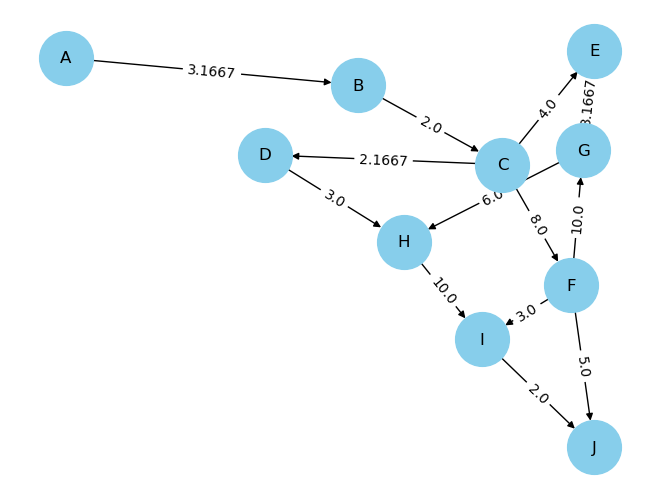

Critical Path:  ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J']
Estimated Overall Mean Duration:  41.1667


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
data = [
    ("A", "B", 1, 3, 6),
    ("B", "C", 1, 2, 3),
    ("C", "D", 1, 2, 4),
    ("C", "E", 2, 4, 6),
    ("C", "F", 7, 8, 9),
    ("D", "H", 2, 3, 4),
    ("E", "G", 2, 3, 5),
    ("F", "G", 8, 10, 12),
    ("F", "I", 2, 3, 4),
    ("F", "J", 3, 5, 7),
    ("G", "H", 4, 6, 8),
    ("H", "I", 9, 10, 11),
    ("I", "J", 1, 2, 3)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for activity in data:
    mean_duration = round((activity[2] + 4*activity[3] + activity[4]) / 6, 4)  # Round to the nearest 0.0001
    G.add_edge(activity[0], activity[1], mean_duration=mean_duration)

# Calculate the earliest start and latest finish for each activity
earliest_start = round(nx.dag_longest_path_length(G, weight='mean_duration'), 4)  # Round to the nearest 0.0001
latest_finish = {node: round(earliest_start, 4) for node in G.nodes}  # Round to the nearest 0.0001

# Find the critical path
critical_path = nx.dag_longest_path(G, weight='mean_duration')

# Draw the network diagram
pos = nx.spring_layout(G, scale=1)  # Increase the scale to make the arrows longer
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, width=1)
edge_labels = nx.get_edge_attributes(G, 'mean_duration')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

print("Critical Path: ", critical_path)
print("Estimated Overall Mean Duration: ", earliest_start)
